In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('prediktiv_data.csv').set_index('id')
data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998


# Data preprocessing

In [3]:
data.isnull().sum()

target            0
feature01         1
feature02         1
feature03         0
feature04         1
feature05         0
feature06         0
feature07         0
feature08         0
feature09         0
feature10         0
feature10.1       0
feature11      2732
feature12      2358
feature13         1
feature14         0
feature15      1422
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
dtype: int64

Jag ser att feature 11, 12, 15 innehåller extremt mycket nullvärden så jag väljer att ta bort dem.

In [4]:
data.drop(['feature11', 'feature12', 'feature15'], axis=1, inplace=True)

Jag ser även att feature 13, 16 är kategoriska, skapar dummy variables till feature dem. Sedan droppar feature 13, 16 kolumn.


In [5]:
data.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature13,feature14,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,red,2,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,red,0,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,red,0,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,red,2,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,red,1,bad,3,1,3,2010,1,701,1998


In [6]:
data = pd.concat([data,pd.get_dummies(data['feature13'],prefix='feature13',drop_first=True)],axis = 1)
data = pd.concat([data,pd.get_dummies(data['feature16'],prefix='feature16',drop_first=True)],axis = 1)

In [7]:
data.drop(['feature13', 'feature16'], axis=1, inplace=True)

Jag observerade även att feature 1, 2, 4 innehåller endast en nullvärde och jag väljer att fylla tomma värdet med 'mean'.


In [8]:
data.fillna(data.mean(), inplace=True)

## Target processing

In [9]:
data.describe()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature22,feature23,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_bad,feature16_good,feature16_horrible,feature16_okay
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766815,472.819734,2.243345,1051.614544,1159.557679,6.443003,1499.690444,6.094881,5.563140,...,335.455973,1984.266553,0.017065,0.000341,0.915358,0.002730,0.509898,0.395904,0.000341,0.023891
std,79886.692357,0.760437,215.009836,35.597181,440.539845,391.890885,1.572964,505.508887,1.411026,1.111537,...,428.395715,20.860286,0.129535,0.018474,0.278395,0.052191,0.499987,0.489128,0.018474,0.152735
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,...,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,...,0.000000,1965.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,...,0.000000,1993.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,213500.000000,2.000000,576.000000,0.000000,1301.500000,1384.000000,7.000000,1742.750000,7.000000,6.000000,...,703.750000,2004.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,...,2065.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Target')

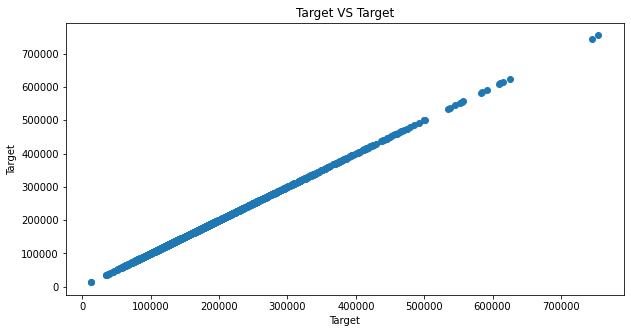

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x= data['target'], y= data['target'])
ax.set_title('Target VS Target')
ax.set_xlabel('Target')
ax.set_ylabel('Target')

Enligt min observation ser jag att target har ett väldigt stor max värde om man jämför med 75%. Det är en difference på ca 540 tusen. Jag bekräfar även med att göra en scatter plot där target jämför med sig själv. Jag väljer att logitimerar target så att det inte är för stora värden.

Jag testade även att excludera rader där target värdet var större än 700 tusen (i detta fall 2st rader) men kom fram till att jag fick en sämre värden i alla modeller.

In [11]:
scaled_target = np.log(data['target'])

## Förbreder en DataFrame för en modell analys

In [12]:
models = pd.DataFrame(index=['train_data_rmse', 'test_data_rmse','train_data_mae','test_data_mae','R2_train','R2_test'], 
                      columns=['NULL_My_Features', 'MLR_My_Features', 'KNN_My_Features', 'LASSO_My_Features'])

# Prediktion med features valda av mig

## Feature selection

Jag gör en heatmap för att inspektera vilka features korrelerar med varandra.

Observation:
- Feature 1 och 2 korrelerar med varandra och jag väljer att droppa feature 1.
- Feature 4 och 5 korrelerar med varandra och jag väljer att droppa feature 4.
- Feature 6 och 7 korrelerar med varandra och jag väljer att droppa feature 6.
- Feature 16_bad och 16_good korrelerar med varandra och jag väljer att droppa feature 16_good.

<function matplotlib.pyplot.show(close=None, block=None)>

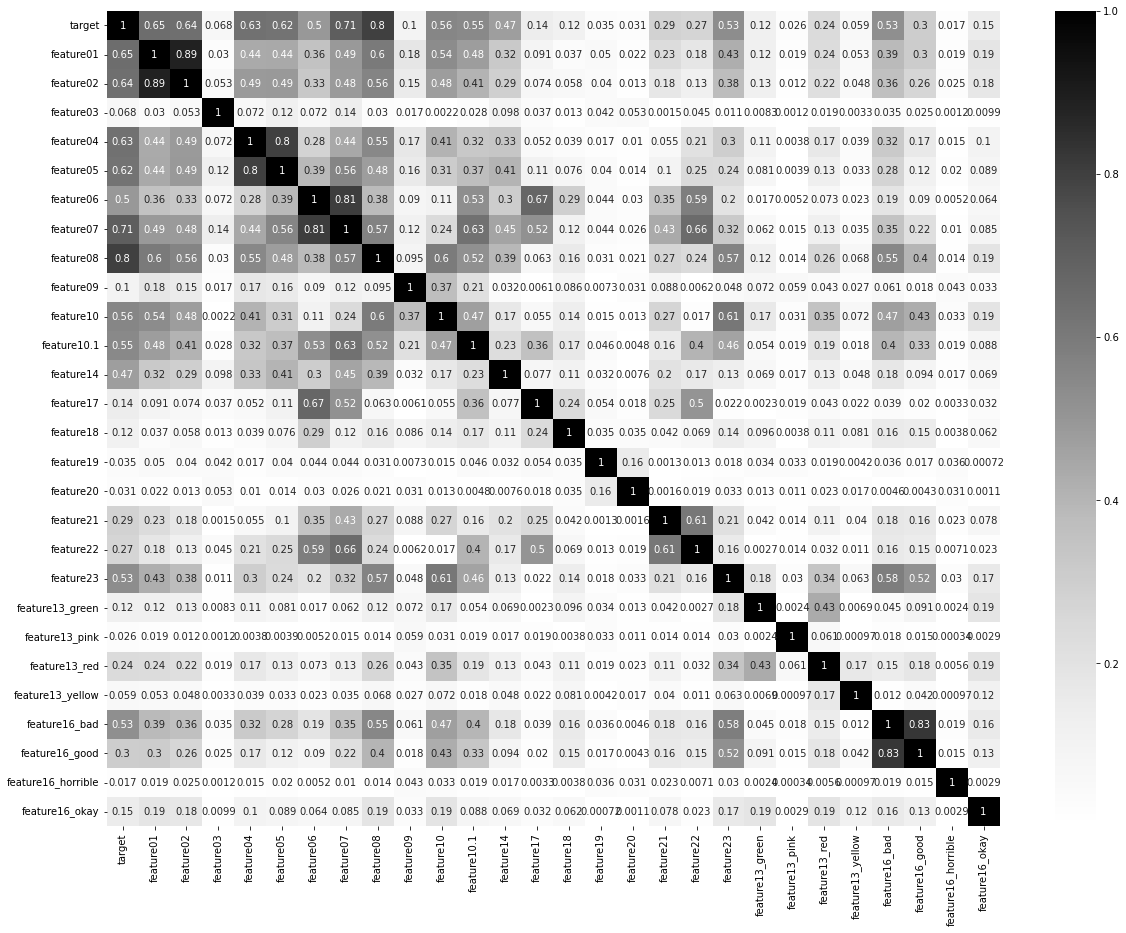

In [14]:
plt.figure(figsize= (20, 15))
cor = data.corr().apply(np.abs)
sns.heatmap(cor, annot=True, cmap= plt.cm.Greys)
plt.show

In [40]:
data.drop(['feature01', 'feature04', 'feature06', 'feature16_good'], axis = 1, inplace = True)

Kollar korrelationen mellan target och alla features och tar även absolutvärdet på alla negativa tal

In [41]:
my_features = data.corr().loc['target'].apply(np.abs).sort_values(ascending=False)
my_features

target                1.000000
feature08             0.799262
feature07             0.706780
feature02             0.640385
feature05             0.621676
feature10             0.558426
feature10.1           0.545604
feature23             0.532974
feature16_bad         0.526721
feature14             0.474558
feature21             0.285056
feature22             0.269373
feature13_red         0.239633
feature16_okay        0.146684
feature17             0.143913
feature13_green       0.123851
feature18             0.119814
feature09             0.101697
feature03             0.068403
feature13_yellow      0.059365
feature19             0.035259
feature20             0.030569
feature13_pink        0.026325
feature16_horrible    0.016956
Name: target, dtype: float64

Jag väljer alla features som har en corr >= 0.47 med target och sedan droppar target från listan. Jag testade corr >= 0.26 men fick för dåliga värden.

In [42]:
my_features = data.corr().loc['target'].apply(np.abs).sort_values(ascending=False)
my_features = list((my_features[my_features >= 0.47].drop('target')).index)

my_features

['feature08',
 'feature07',
 'feature02',
 'feature05',
 'feature10',
 'feature10.1',
 'feature23',
 'feature16_bad',
 'feature14']

Jag testade att lägga till alla kategorsika features och det gjorde ingen skillnad så jag valde att exkludera dem

In [43]:
#my_features_kat = list(['feature13_green', 'feature13_pink', 'feature13_red', 'feature13_yellow', 'feature16_bad', 'feature16_good', 'feature16_horrible', 'feature16_okay' ])
#my_features_final = my_features + my_features_kat

#my_features_final

## Skapar min train och test data

In [44]:
target_name = 'target'
X = data[my_features]
y = scaled_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

## Null Modell

In [45]:
y_pred_null = y_train.mean()
models.loc['train_data_rmse', 'NULL_My_Features'] = mean_squared_error(y_pred= np.repeat(y_pred_null, y_train.size), y_true= y_train, squared= False)
models.loc['test_data_rmse', 'NULL_My_Features'] = mean_squared_error(y_pred= np.repeat(y_pred_null, y_test.size), y_true= y_test, squared= False)

models.loc['train_data_mae', 'NULL_My_Features'] = mean_absolute_error(y_pred= np.repeat(y_pred_null, y_train.size), y_true= y_train)
models.loc['test_data_mae', 'NULL_My_Features'] = mean_absolute_error(y_pred= np.repeat(y_pred_null, y_test.size), y_true= y_test)

models

,NULL_My_Features,MLR_My_Features,KNN_My_Features,LASSO_My_Features
train_data_rmse,0.40537,NaN,NaN,NaN
test_data_rmse,0.416196,NaN,NaN,NaN
train_data_mae,0.311897,NaN,NaN,NaN
test_data_mae,0.324214,NaN,NaN,NaN
R2_train,NaN,NaN,NaN,NaN
R2_test,NaN,NaN,NaN,NaN


### Summering - Null Modell

Error metrics ser inte så jätte bra ut för Null modellen

## Multiple Linear Regression

In [46]:
linreg = LinearRegression(n_jobs=-1)
linreg.fit(X_train, y_train)

models.loc['train_data_rmse', 'MLR_My_Features'] = mean_squared_error(y_pred= linreg.predict(X_train), y_true= y_train, squared= False)
models.loc['test_data_rmse', 'MLR_My_Features'] = mean_squared_error(y_pred= linreg.predict(X_test), y_true= y_test, squared= False)

models.loc['train_data_mae', 'MLR_My_Features'] = mean_absolute_error(y_pred= linreg.predict(X_train), y_true= y_train)
models.loc['test_data_mae', 'MLR_My_Features'] = mean_absolute_error(y_pred= linreg.predict(X_test), y_true= y_test)

models.loc['R2_train', 'MLR_My_Features'] = r2_score(y_pred= linreg.predict(X_train), y_true= y_train)
models.loc['R2_test', 'MLR_My_Features'] = r2_score(y_pred= linreg.predict(X_test), y_true= y_test)

models

,NULL_My_Features,MLR_My_Features,KNN_My_Features,LASSO_My_Features
train_data_rmse,0.40537,0.167525,NaN,NaN
test_data_rmse,0.416196,0.159674,NaN,NaN
train_data_mae,0.311897,0.113407,NaN,NaN
test_data_mae,0.324214,0.115049,NaN,NaN
R2_train,NaN,0.829213,NaN,NaN
R2_test,NaN,0.8521,NaN,NaN


### Summering - Multiple Linear Regression

Jag får riktigt bra värde på error metric men även en väldigt hög accuracy (R2_test).

## K-Nearest Neighbors

In [47]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

models.loc['train_data_rmse', 'KNN_My_Features'] = mean_squared_error(y_pred= knn.predict(X_train), y_true= y_train, squared= False)
models.loc['test_data_rmse', 'KNN_My_Features'] = mean_squared_error(y_pred= knn.predict(X_test), y_true= y_test, squared= False)

models.loc['train_data_mae', 'KNN_My_Features'] = mean_absolute_error(y_pred= knn.predict(X_train), y_true= y_train)
models.loc['test_data_mae', 'KNN_My_Features'] = mean_absolute_error(y_pred= knn.predict(X_test), y_true= y_test)

models.loc['R2_train', 'KNN_My_Features'] = r2_score(y_pred= knn.predict(X_train), y_true= y_train)
models.loc['R2_test', 'KNN_My_Features'] = r2_score(y_pred= knn.predict(X_test), y_true= y_test)

models

,NULL_My_Features,MLR_My_Features,KNN_My_Features,LASSO_My_Features
train_data_rmse,0.40537,0.167525,0.226076,NaN
test_data_rmse,0.416196,0.159674,0.241247,NaN
train_data_mae,0.311897,0.113407,0.158972,NaN
test_data_mae,0.324214,0.115049,0.169621,NaN
R2_train,NaN,0.829213,0.688968,NaN
R2_test,NaN,0.8521,0.662383,NaN


### Summering - K-Nearest Neighbors

KNN fick helt okej värden men betydligt mycket sämmre än MLR

## LASSO

In [48]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)

models.loc['train_data_rmse', 'LASSO_My_Features'] = mean_squared_error(y_pred=lasso.predict(X_train), y_true= y_train, squared= False)
models.loc['test_data_rmse', 'LASSO_My_Features'] = mean_squared_error(y_pred=lasso.predict(X_test), y_true= y_test, squared= False)

models.loc['train_data_mae', 'LASSO_My_Features'] = mean_absolute_error(y_pred=lasso.predict(X_train), y_true= y_train)
models.loc['test_data_mae', 'LASSO_My_Features'] = mean_absolute_error(y_pred=lasso.predict(X_test), y_true= y_test)

models.loc['R2_train', 'LASSO_My_Features'] = r2_score(y_pred=lasso.predict(X_train), y_true= y_train)
models.loc['R2_test', 'LASSO_My_Features'] = r2_score(y_pred=lasso.predict(X_test), y_true= y_test)

models

,NULL_My_Features,MLR_My_Features,KNN_My_Features,LASSO_My_Features
train_data_rmse,0.40537,0.167525,0.226076,0.167976
test_data_rmse,0.416196,0.159674,0.241247,0.160343
train_data_mae,0.311897,0.113407,0.158972,0.112786
test_data_mae,0.324214,0.115049,0.169621,0.115083
R2_train,NaN,0.829213,0.688968,0.828292
R2_test,NaN,0.8521,0.662383,0.850857


### Summering - LASSO

Lasso är betydligt mycket bättre än KNN och går hand i hand med MLR. MLR är snäppet bättre.

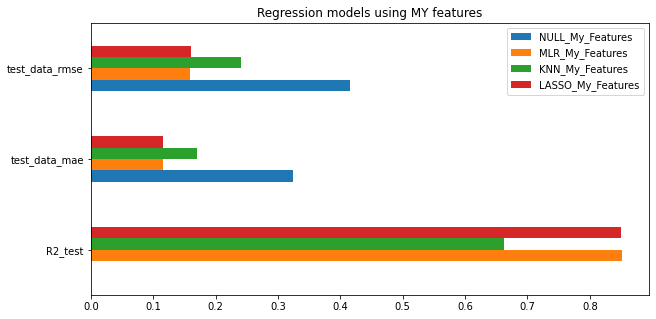

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
models.loc[['R2_test', 'test_data_mae', 'test_data_rmse']].plot(kind='barh', ax=ax)
ax.set_title('Regression models using MY features')
ax.set_label 
ax.legend(loc=1);

## MLR Pred and True

In [50]:
pred = linreg.predict(X_test)
pred = pd.Series(pred)
pred = np.exp(pred)

pred.describe()

count       586.000000
mean     174442.769616
std       66537.818800
min       55435.527402
25%      123273.306323
50%      157744.725995
75%      208132.592665
max      454245.470927
dtype: float64

In [51]:
np.exp(y_test).describe()

count       586.000000
mean     176947.180887
std       76615.928578
min       34900.000000
25%      126381.250000
50%      158225.000000
75%      212750.000000
max      582933.000000
Name: target, dtype: float64

### Summering för features valda av mig

Jag har kommit fram till att MLR ger bäst resultet för alla features jag valt.
Jag väljer att jämföra MLR med Lassos valda feature och sen även alla features för att se om jag kan få bättre värden än mina egen valda features.

# Prediktion med features valda av Lasso och ALLA features

### Förbreder en DataFrame för en modell analys

In [52]:
models2 = pd.DataFrame(index=['test_data_rmse','test_data_mae','R2_test'], 
                      columns=['MLR_My_Features', 'MLR_Lasso_Features', 'MLR_ALL_Features'])

## MLR My Features

In [53]:
models2.loc['test_data_rmse', 'MLR_My_Features'] = mean_squared_error(y_pred= linreg.predict(X_test), y_true= y_test, squared= False)
models2.loc['test_data_mae', 'MLR_My_Features'] = mean_absolute_error(y_pred= linreg.predict(X_test), y_true= y_test)
models2.loc['R2_test', 'MLR_My_Features'] = r2_score(y_pred= linreg.predict(X_test), y_true= y_test)

models2

,MLR_My_Features,MLR_Lasso_Features,MLR_ALL_Features
test_data_rmse,0.159674,NaN,NaN
test_data_mae,0.115049,NaN,NaN
R2_test,0.8521,NaN,NaN


## MLR LASSO

### Lasso väljer features åt oss och jag sparar det sedan i en array (lasso_freatures)

In [54]:
print('Features valda av Lasso:\n')
for i,var in enumerate(X.columns[lasso.coef_>0]):
    print("{}.{}".format(i+1, var))

Features valda av Lasso:

1.feature08
2.feature07
3.feature02
4.feature05
5.feature10
6.feature23
7.feature14


In [55]:
lasso_freatures = ['feature02', 'feature05', 'feature07', 'feature08', 'feature10', 'feature14', 'feature23']

### Tränar om train och test med de lassos featuers

In [56]:
X = data[lasso_freatures]
y = scaled_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

In [57]:
linreg.fit(X_train, y_train)

models2.loc['test_data_rmse', 'MLR_Lasso_Features'] = mean_squared_error(y_pred= linreg.predict(X_test), y_true= y_test, squared= False)

models2.loc['test_data_mae', 'MLR_Lasso_Features'] = mean_absolute_error(y_pred= linreg.predict(X_test), y_true= y_test)

models2.loc['R2_test', 'MLR_Lasso_Features'] = r2_score(y_pred= linreg.predict(X_test), y_true= y_test)

models2

,MLR_My_Features,MLR_Lasso_Features,MLR_ALL_Features
test_data_rmse,0.159674,0.160095,NaN
test_data_mae,0.115049,0.115636,NaN
R2_test,0.8521,0.851319,NaN


## MLR ALL Features

### Tränar om train och test med alla featuers

In [58]:
target_name = 'target'
X = data.drop(target_name, axis=1)
y = scaled_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

In [59]:
linreg.fit(X_train, y_train)

models2.loc['test_data_rmse', 'MLR_ALL_Features'] = mean_squared_error(y_pred= linreg.predict(X_test), y_true= y_test, squared= False)

models2.loc['test_data_mae', 'MLR_ALL_Features'] = mean_absolute_error(y_pred= linreg.predict(X_test), y_true= y_test)

models2.loc['R2_test', 'MLR_ALL_Features'] = r2_score(y_pred= linreg.predict(X_test), y_true= y_test)

models2

,MLR_My_Features,MLR_Lasso_Features,MLR_ALL_Features
test_data_rmse,0.159674,0.160095,0.144518
test_data_mae,0.115049,0.115636,0.105572
R2_test,0.8521,0.851319,0.878844


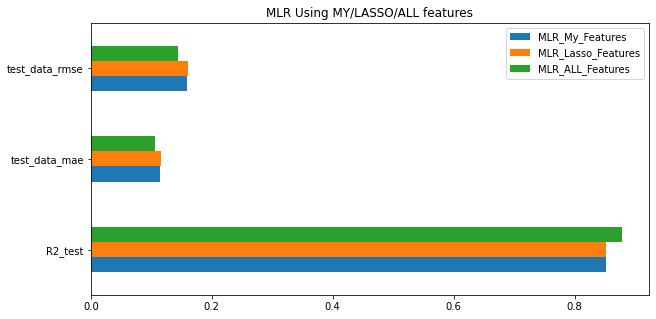

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
models2.loc[['R2_test', 'test_data_mae', 'test_data_rmse']].plot(kind='barh', ax=ax)
ax.set_title('MLR Using MY/LASSO/ALL features')
ax.set_label 
ax.legend(loc=1);

# Read Me

## **Sammanfattning för MLR med mina valda features, Lassos valda features & Alla features**
***

**Jag förväntade mig inte slutreslutatet. Det visar sig i detta fall att man fick bäst resultat i MLR när man använde sig utav alla features.**

**Om jag jämför värden mellan mina valda features, Lassos valda features och alla features så är det väldigt nära varandra. Inte så jätte stor differens som man kan se ovan. Cirka 2.5% skillnad i accuracy när man jämför mina valda features och Lassos valda med alla features.**

**Vi ser även här att mina features och Lassos features går nästan hand i hand vilket tyder på att jag gjorde en väldigt bra feature selection. Mina features var dock snäppet bättre än Lassos**

*Jag skulle slutligen säga att jag är väldigt nöjd med mina val av features och resultatet jag fick. Jag skulle säga att detta dataset var riktigt bra gjord och fick därför väldigt bra värden när jag använde mig utav alla features. Dataset kommer väldigt sällan vara så bra som denna, därför skulle jag påstå att mina valda features var riktigt bra.*